# Inventory

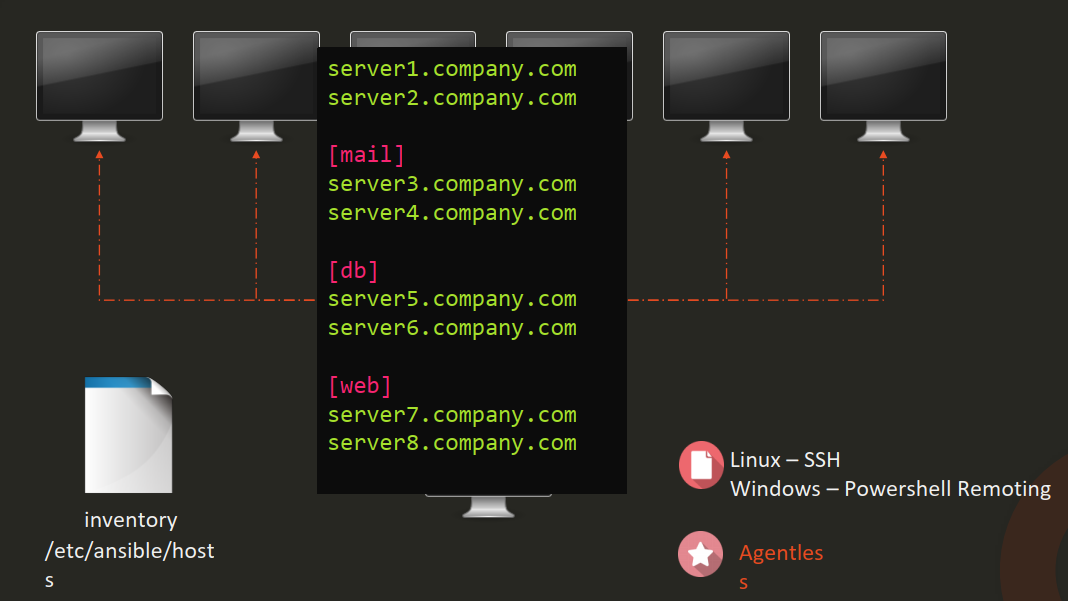

Ansible can work with one or multiple systems in your infrastructure at the same time.
* In order to work with multiple servers, Ansible needs to establish connectivity to those servers.
* This is done using SSH for Linux and PowerShell Remoting for Windows.
* That's what makes Ansible **Agentless**.
* Agentless means that you don't need to install any additional software on the target machines to be able to work with Ansible.
* A simple SSH connectivity would suffice for Ansible's needs.

> One of the major disadvantages of most other orchestration tools is that you are required to configure an agent on the target systems before you can invoke any kind of automation.

Now, information about these target systems is stored in an **inventory file**.

If you don't create a new inventory file, Ansible uses the **default inventory file** located at `etc/Ansible/hosts` location.

---

Let's take a look at a sample inventory file.
* The inventory file is in an `.ini` format.
* It's simply a number of servers listed, one after the other.
* You can also group different servers together by defining them like this under the name of the group within square brackets, and define the list of servers part of that group in the lines below.
* You can have multiple groups defined in a single inventory file.

# More on Inventory files

**Inventory file**

```ini
# Sample Inventory File

# Web Servers
web1 ansible_host=server1.company.com ansible_connection=ssh ansible_user=root ansible_ssh_pass=Password123!
web2 ansible_host=server2.company.com ansible_connection=ssh ansible_user=root ansible_ssh_pass=Password123!
web3 ansible_host=server3.company.com ansible_connection=ssh ansible_user=root ansible_ssh_pass=Password123!

# Database Servers
db1 ansible_host=server4.company.com ansible_connection=winrm ansible_user=administrator ansible_password=Password123!

# Localhost
localhost ansible_connection=localhost

# Web Servers Group
[web_servers]
web1
web2
web3

# Database Servers Group
[db_servers]
db1


# Group of Groups
[all_servers:children]
web_servers
db_servers

```

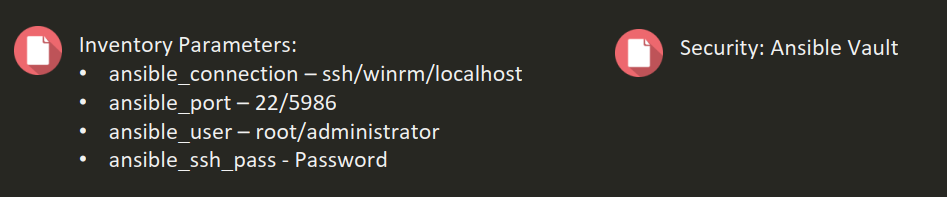


Let's take a closer look at inventory files.
* For example, we have a list of servers named from **server1** to **server4**.
* However, we would like to refer to these servers in Ansible using an alias such as **web** server or **database** server.
* We could do this by adding an alias for each server at the beginning of the line and assigning the address of that server to the `ansible_host` parameter.

The `ansible_host` is an inventory parameter used to specify the FQDN or IP address of a server.

There are other inventory parameters, too, and some of them are
* `ansible_connection`
* `ansible_port`
* `ansible_user`
* `ansible_ssh_pass`
* `ansible_password`

The `ansible_connection` is what defines how Ansible connects to the target server.
* Is this an **SSH connection to a Linux server** or a **Windows Remote (WIN RM) connection to a Windows server**?
* This is how we define whether the target host we wish to connect to is a Linux or a Windows host.
* You could also set it to the **localhost** to indicate that we would like to work with the local host and not connect to any remote hosts.
* If you don't have multiple servers to play around with, you could simply start with a local host in your inventory file.

The `ansible_port` defines which part to connect to.
* By default, it is set to port `22` for **SSH**.
* But if you need to change, you can set it differently using the `ansible_port` parameter.

The `ansible_user` defines the user used to make remote connections. 
* By default, this is set to **root** for Linux machines or **administrator** for Windows machines.
* If you need to change this, you can set it differently using the `ansible_user` parameter.

The `ansible_ssh_pass` defines the SSH password for Linux.
* Note that storing passwords in plain text format like this may not be ideal.
* The best practice is to **set up SSH key-based passwordless authentication between the servers**, and you should definitely do that in your production or corporate environments.
* But for now, we wanna start with the absolute basics of Ansible without getting too much into security or other topics.
* So, to begin with, we'll start with a really basic setup with a username and password.
* Otherwise, you would be stuck configuring and troubleshooting security issues for the most part of this course.

> Note: For Linux-based hosts, use the `ansible_ssh_pass` parameter and for Windows-based hosts, use the `ansible_password` parameter.

# Sample Inventory File

```ini
# Sample Inventory File

# Web Servers
web_node1 ansible_host=web01.xyz.com ansible_connection=winrm ansible_user=administrator ansible_password=Win$Pass
web_node2 ansible_host=web02.xyz.com ansible_connection=winrm ansible_user=administrator ansible_password=Win$Pass
web_node3 ansible_host=web03.xyz.com ansible_connection=winrm ansible_user=administrator ansible_password=Win$Pass

# DB Servers
sql_db1 ansible_host=sql01.xyz.com ansible_connection=ssh ansible_user=root ansible_ssh_pass=Lin$Pass
sql_db2 ansible_host=sql02.xyz.com ansible_connection=ssh ansible_user=root ansible_ssh_pass=Lin$Pass

# Database Server Group
[db_nodes]
sql_db1
sql_db2

# Web Server Group
[web_nodes]
web_node1
web_node2
web_node3

# Boston node group
[boston_nodes]
sql_db1
web_node1

# Dallas node group
[dallas_nodes]
sql_db2
web_node2
web_node3

# Group of Groups (US nodes)
[us_nodes:children]
boston_nodes
dallas_nodes
```

# Inventory Formats

Ansible supports two main types of inventory formats, **`INI`** and **`YAML`**.

Let's take the example of two companies.
* The first is a **small startup** with a few services handling basic functions like web hosting and database management.
* The second is a **multinational corporation** with hundreds of servers spread across the globe, handling diverse functions like e-commerce, customer support, data analysis, and more.

For the small startup, a simple **`INI` format inventory** would suffice. It's like a basic organizational chart with only a few departments.

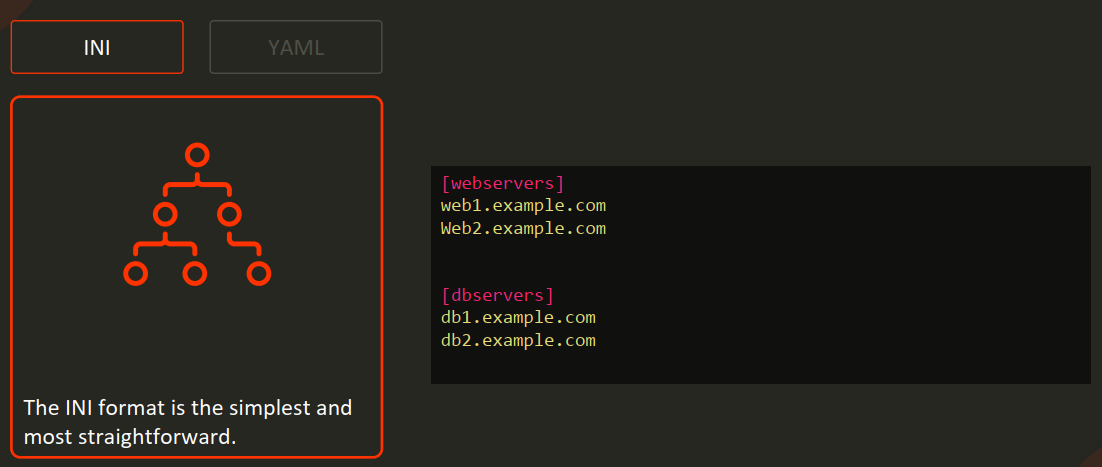

However, for the multinational corporation, a more detailed and structured inventory would be needed. 
* This is where the **`YAML` format inventory**comes in.
* It's like a complex organizational chart with various departments, sub-departments, and teams.

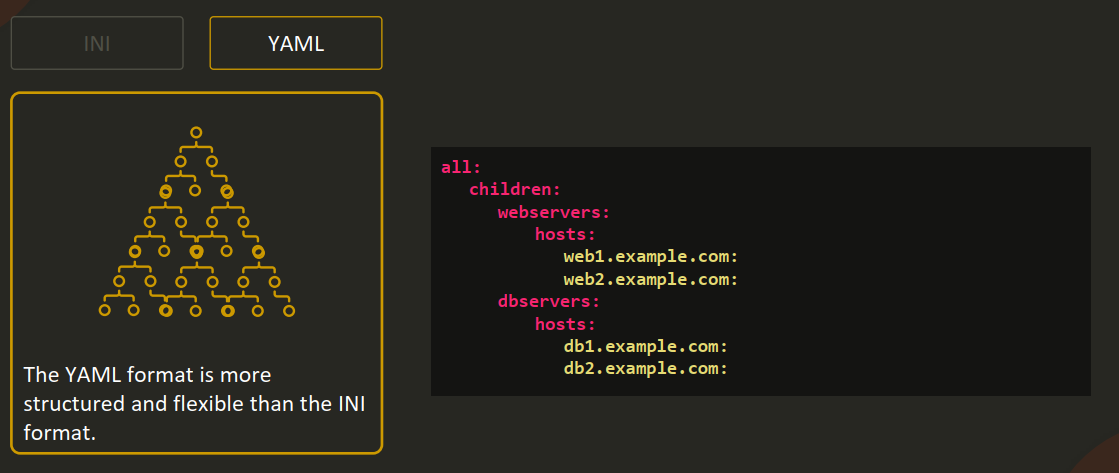

The different inventory formats also **offer flexibility**, allowing you to group your servers 
* **based on their roles**, like: 
    * web servers,
    * database servers, 
    * application servers in a company,
* **based on their geographic location**, like:
    * servers in the U.S.,
    * servers in Europe, 
    * servers in Asia,
* or **based on any other criteria** that make sense for your organization.

# Grouping and Parent-Child Relationships

Imagine you're an IT administrator in a large organization with a complex IT infrastructure.
* You have hundreds of servers, spread across multiple locations, serving different purposes.
* Some are web servers, some are database servers, and others could be application servers.
* Managing these servers individually can be a daunting task.
* For instance, if you need to update the web servers, you would have to manually specify each web server.
* This is not only time-consuming but also prone to errors.

---

In managing a complex IT infrastructure, wouldn't it be convenient if we could ***categorize servers*** based on their **roles**, **locations**, or **any other criteria** that make sense in our environment?
* For instance, imagine if we could **collectively identify all our web servers under a common label**, say, `web servers`.
* This would mean that when an update is needed for the web servers, instead of manually specifying each server, we could simply target the `web servers` label.
* The changes would then be applied to all servers associated with that label, saving us time and reducing the risk of errors.
* This is not just a hypothetical scenario.

---

This is precisely where Ansible's **grouping feature** comes into play.
* With Ansible's grouping, we can create these common labels or groups to efficiently manage and operate on a set of servers at once.
* Now, when you need to update the web servers, you can simply target the `web servers` group, and Ansible will apply the changes to all servers in that group.

---

**But what if your web servers are spread across different locations, and servers in each location need to have some location-specific configurations?**
* You could create separate groups for web servers in each location, but that would mean duplicating a lot of common configurations.
* This is where Ansible's parent-to-child relationships come in handy.

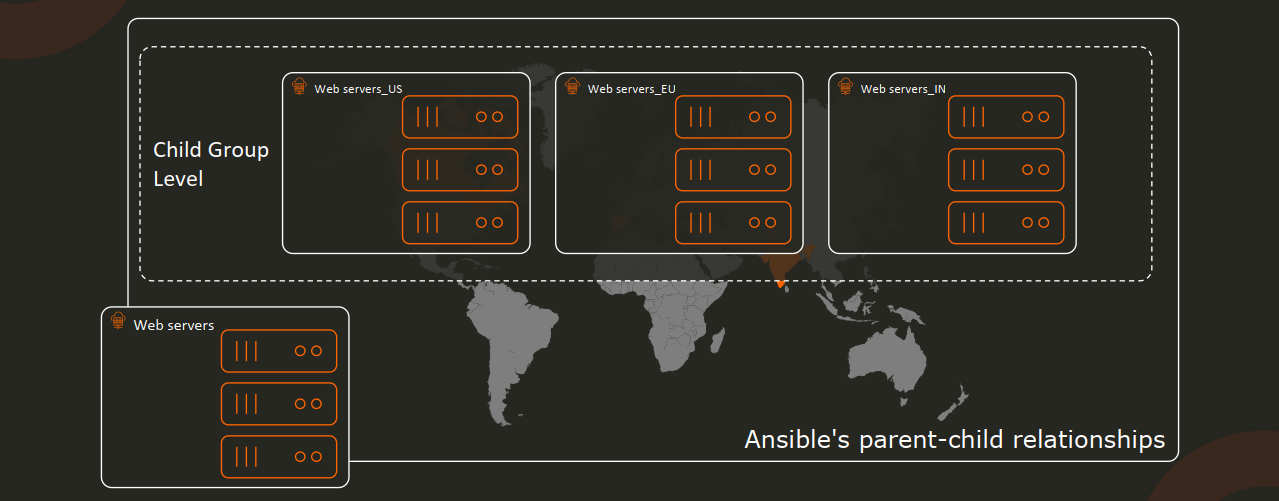

You can create a **parent group** called `Web servers` and **child groups** for each location, for example, `Web servers_US`, `Web servers_EU`, and `Web servers_IN`.
* You can define the **common configurations at the parent group level** and **location-specific configurations at the child group level**.
* This way, you can manage your servers more efficiently and avoid configuration duplication.


## INI format: Grouping and Parent-child relationships

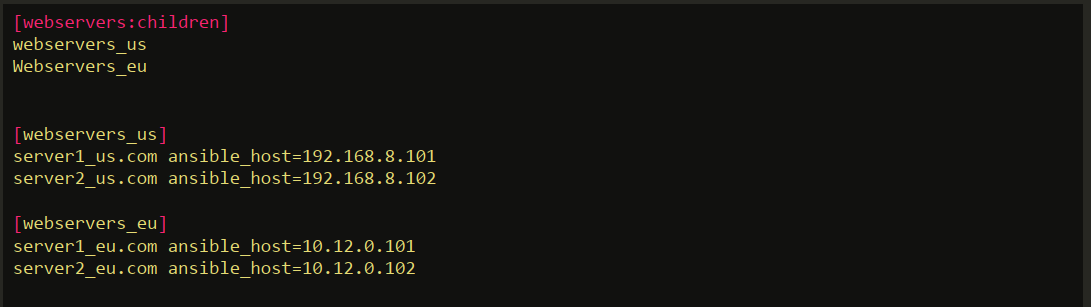

In the `INI` format, groups are defined using **square brackets**, and hosts are listed under their respective groups.

Parent-child relationships are defined using the `:children` suffix.

In this example, `Web servers_US` and `Web servers_EU` are **groups**, and `Web servers` is a **parent group** that includes both `Web servers_US` and `Web servers_EU` as **child groups**.

## YAML format: Grouping and Parent-child relationships

In the `YAML` format, groups are defined using the keyword `hosts`, and parent-child relationships are defined using the keyword `children`.

Below is the same example presented in YAML format for better readability and understanding.

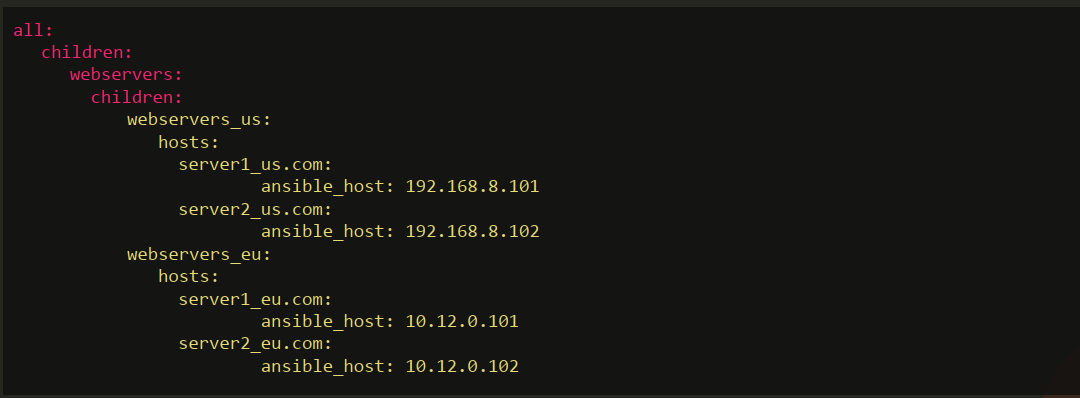